In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

[0. 1.]
[nan nan]


/home/anirudha/miniconda3/envs/cod/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


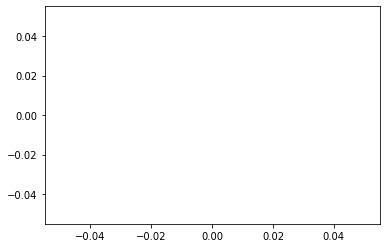

In [5]:
from sklearn.metrics import roc_curve,roc_auc_score,roc_curve
a=[0,0,0,0,0,0,0,0]
b=[1,1,1,1,1,1,1,1]
tpr,fpr,_=roc_curve(a,b)
print(tpr)
print(fpr)
plt.plot(fpr,tpr)


In [ ]:
tsv=""""""dataset	loss	Top1	SCE	ECE	AUROC
cifar10	cross_entropy	92.81	8.349	3.9858	0.918378
cifar10	IFL	92.85	8.669694162	4.058691077	0.919774356
svhn	cross_entropy	96.59	2.175	0.3003	0.927627
svhn	IFL	92.72	1.555530328	0.4016411733	0.9250222809
tinyimagenet	cross_entropy	61.95	2.14468	14..67369	0.850139
tinyimagenet	IFL	66.12	1.883637619	12.69220612	0.8624813941"""
parsed_tsv=

In [1]:
root="./aurocs/"
# for each file in root directory read the file and plot the data
import os
import matplotlib.pyplot as plt
import numpy as np
def get_trained_loss(checkpoint):
    if "imagenet" in checkpoint:
        return "".join(checkpoint.split("_")[4:6]) 
    return "".join(checkpoint.split("_")[3:-1])
    trained_loss=("".join(checkpoint.split('.')[0].split('_')[2:]))[:-12]
    return trained_loss
if not os.path.isdir("aurocs/plots/"):
    os.makedirs("aurocs/plots/")

    

FL+MDCAgamma=1.0
focalloss
FL+MDCAgamma=2.0
focalloss
focalloss
FL+MDCAgamma=3.0


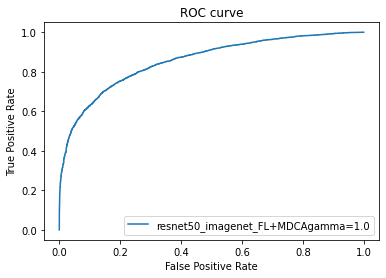

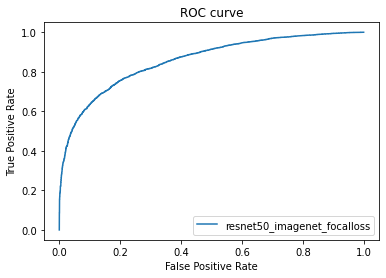

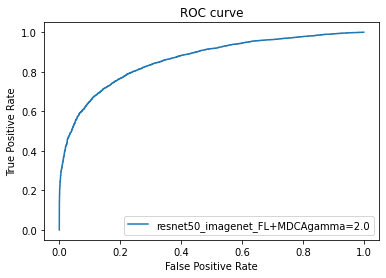

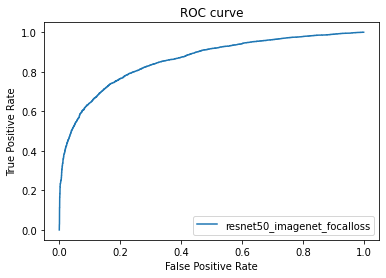

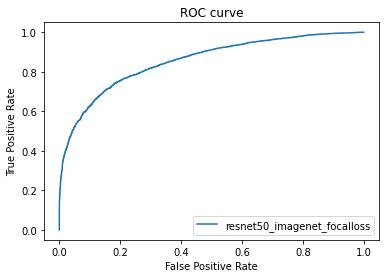

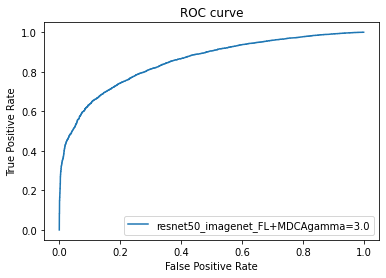

In [2]:
for file in os.listdir(root):
    if not ".png" in file and os.path.isfile(root+file) and "resnet32" in file and "cifar10" in file and ("cross_entropy" in file or ) :
        plt.figure()
        data = np.load(root+file)
        # file= resnet56_svhn_NLL+MDCA_25-May_tpr_fpr.npy, trained_loss=NLL+MDCA, model=resnet56, dataset=svhn
        trained_loss=get_trained_loss(file)
        print(trained_loss)
        model=file.split('_')[2]
        dataset=file.split('_')[0]
        x = data[0:len(data)//2]
        y = data[len(data)//2:]
        plt.plot(x,y,label=model+"_"+dataset+"_"+trained_loss)
        plt.title("ROC curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.savefig(root+"/plots/"+file+".png")
        

In [3]:
# for all files with same model and dataset plot on same plot
plots={}
for file in os.listdir(root):
    if not ".png" in file and os.path.isfile(root+file):
        data = np.load(root+file)

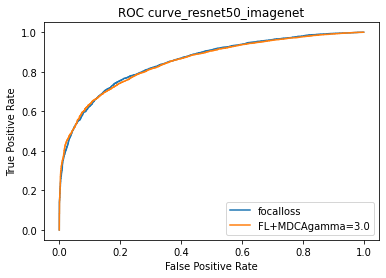

In [9]:
# for all files with same model and dataset plot on same plot
plots={}
for file in os.listdir(root):
    if not ".png" in file and os.path.isfile(root+file) and "imagenet" in file and ("gamma=3.0" in file or "focal_loss" in file) :
        data = np.load(root+file)
        # file= resnet56_svhn_NLL+MDCA_25-May_tpr_fpr.npy, trained_loss=NLL+MDCA, model=resnet56, dataset=svhn
        trained_loss=get_trained_loss(file)
        model=file.split('_')[2]
        dataset=file.split('_')[0]
        if model+'_'+dataset not in plots:
            plots[model+'_'+dataset]={}
        plots[model+'_'+dataset][trained_loss]=data

for plot in plots:
    plt.figure()
    for trained_loss in plots[plot]:
        data=plots[plot][trained_loss]
        x = data[0:len(data)//2]
        y = data[len(data)//2:]
        plt.plot(x,y,label=trained_loss)
    plt.title("ROC curve"+"_"+plot)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig(root+"/plots/"+plot+"_combined.svg",dpi=600)
    

In [76]:
best_with_ece=[
    {
        "model":"resnet32",
        "dataset":"cifar10",
        "gamma":1.0,
        "beta":1.0,
    },
    {
        "model":"resnet32",
        "dataset":"cifar10",
        "gamma":2.0,
        "beta":5.0,
    },
    {
        "model":"resnet32",
        "dataset":"cifar10",
        "gamma":3.0,
        "beta":10.0,
    },
    {
        "model":"resnet56",
        "dataset":"svhn",
        "gamma":1.0,
        "beta":20.0,
    },
    {
        "model":"resnet56",
        "dataset":"svhn",
        "gamma":2.0,
        "beta":20.0,
    },
    {
        "model":"resnet56",
        "dataset":"svhn",
        "gamma":3.0,
        "beta":5.0,
    },
]
best_with_auroc=[
    {
        "model":"resnet32",
        "dataset":"cifar10",
        "gamma":1.0,
        "beta":1.0,
    },
    {
        "model":"resnet32",
        "dataset":"cifar10",
        "gamma":2.0,
        "beta":20.0,
    },
    {
        "model":"resnet32",
        "dataset":"cifar10",
        "gamma":3.0,
        "beta":10.0,
    },
    {
        "model":"resnet56",
        "dataset":"svhn",
        "gamma":1.0,
        "beta":1.0,
    },
    {
        "model":"resnet56",
        "dataset":"svhn",
        "gamma":2.0,
        "beta":5.0,
    },
    {
        "model":"resnet56",
        "dataset":"svhn",
        "gamma":3.0,
        "beta":10.0,
    },
]
'''
data files:
'cifar10_29-May_resnet32_FL+MDCA_gamma=1.0_beta=10.0_anirudha.npy'
'cifar10_29-May_resnet32_FL+MDCA_gamma=1.0_beta=1.0_anirudha.npy'
'cifar10_29-May_resnet32_FL+MDCA_gamma=1.0_beta=5.0_anirudha.npy'
'cifar10_29-May_resnet32_FL+MDCA_gamma=3.0_beta=10.0_anirudha.npy'
'cifar10_29-May_resnet32_FL+MDCA_gamma=3.0_beta=1.0_anirudha.npy'
'cifar10_29-May_resnet32_FL+MDCA_gamma=3.0_beta=20.0_anirudha.npy'
'cifar10_29-May_resnet32_FL+MDCA_gamma=3.0_beta=5.0_anirudha.npy'
'cifar10_29-May_resnet32_focal_loss_gamma=1.0_anirudha.npy'
'cifar10_29-May_resnet32_focal_loss_gamma=2.0_anirudha.npy'
'cifar10_29-May_resnet32_focal_loss_gamma=3.0_anirudha.npy'
'cifar10_30-May_resnet32_FL+MDCA_gamma=1.0_beta=20.0_anirudha.npy'
'cifar10_30-May_resnet32_FL+MDCA_gamma=2.0_beta=10.0_anirudha.npy'
'cifar10_30-May_resnet32_FL+MDCA_gamma=2.0_beta=1.0_anirudha.npy'
'cifar10_30-May_resnet32_FL+MDCA_gamma=2.0_beta=20.0_anirudha.npy'
'cifar10_30-May_resnet32_FL+MDCA_gamma=2.0_beta=5.0_anirudha.npy'
'svhn_29-May_resnet56_FL+MDCA_gamma=2.0_beta=1.0_anirudha.npy'
'svhn_29-May_resnet56_FL+MDCA_gamma=2.0_beta=5.0_anirudha.npy'
'svhn_29-May_resnet56_FL+MDCA_gamma=3.0_beta=10.0_anirudha.npy'
'svhn_29-May_resnet56_FL+MDCA_gamma=3.0_beta=1.0_anirudha.npy'
'svhn_29-May_resnet56_FL+MDCA_gamma=3.0_beta=20.0_anirudha.npy'
'svhn_29-May_resnet56_FL+MDCA_gamma=3.0_beta=5.0_anirudha.npy'
'svhn_29-May_resnet56_focal_loss_gamma=1.0_anirudha.npy'
'svhn_29-May_resnet56_focal_loss_gamma=2.0_anirudha.npy'
'svhn_29-May_resnet56_focal_loss_gamma=3.0_anirudha.npy'
'svhn_30-May_resnet56_FL+MDCA_gamma=1.0_beta=10.0_anirudha.npy'
'svhn_30-May_resnet56_FL+MDCA_gamma=1.0_beta=1.0_anirudha.npy'
'svhn_30-May_resnet56_FL+MDCA_gamma=1.0_beta=20.0_anirudha.npy'
'''
plots={}
for file in os.listdir(root):
    if os.path.isfile(root+file):
        data=np.load(root+file)
        model=file.split('_')[2]
        dataset=file.split('_')[0]
        loss=get_trained_loss(file)
        gamma=0
        if 'focal_loss' in file:
            gamma= file[file.find("gamma=")+6:file.find("_anirudha")]
        else:
            gamma=file[file.find('gamma=')+6:file.find('_beta')]
            beta=file[file.find('beta=')+5:file.find('_anirudha')]
        for key in best_with_ece:
            mykey=model+'_'+dataset+'_'+gamma
            if model==key["model"] and dataset==key["dataset"]  and float(gamma)==float(key["gamma"]):
                if 'focal_loss' in file :
                    if not mykey in plots:
                        plots[mykey]={}
                    plots[mykey]['focal_loss']=data 
                    print(file)
                else:
                    if "beta="+str(key['beta']) in file and "gamma="+str(key['gamma']) in file:
                        if not mykey in plots:
                            plots[mykey]={}
                        
                        plots[mykey]['FL+MDCA']=data
                        print(file)
# print(plots)




cifar10_29-May_resnet32_focal_loss_gamma=1.0_anirudha.npy
svhn_30-May_resnet56_FL+MDCA_gamma=2.0_beta=20.0_anirudha.npy
cifar10_29-May_resnet32_FL+MDCA_gamma=1.0_beta=1.0_anirudha.npy
svhn_29-May_resnet56_focal_loss_gamma=3.0_anirudha.npy
cifar10_30-May_resnet32_FL+MDCA_gamma=2.0_beta=5.0_anirudha.npy
svhn_29-May_resnet56_focal_loss_gamma=2.0_anirudha.npy
svhn_29-May_resnet56_focal_loss_gamma=1.0_anirudha.npy
cifar10_29-May_resnet32_focal_loss_gamma=2.0_anirudha.npy
cifar10_29-May_resnet32_FL+MDCA_gamma=3.0_beta=10.0_anirudha.npy
cifar10_29-May_resnet32_focal_loss_gamma=3.0_anirudha.npy
svhn_29-May_resnet56_FL+MDCA_gamma=3.0_beta=5.0_anirudha.npy
svhn_30-May_resnet56_FL+MDCA_gamma=1.0_beta=20.0_anirudha.npy


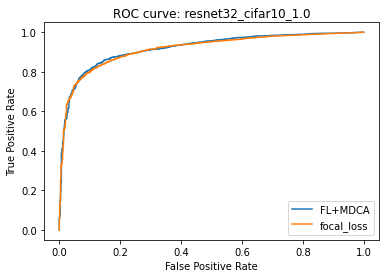

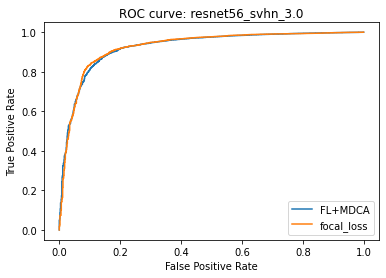

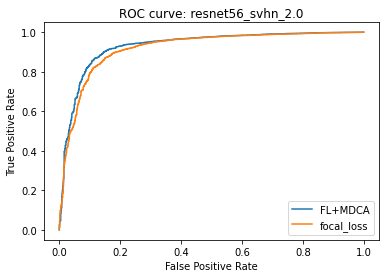

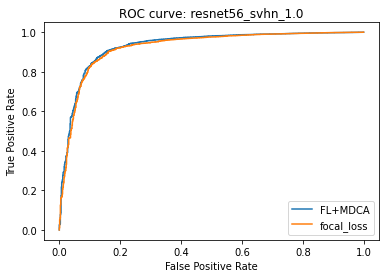

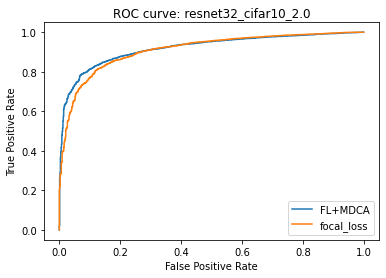

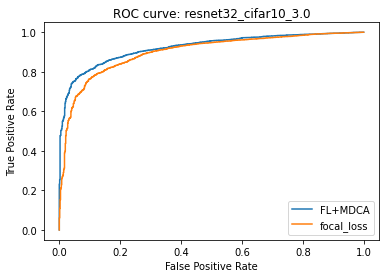

In [81]:
for p in plots:
    plt.figure()
    data=plots[p]["FL+MDCA"]
    x=data[0:len(data)//2]
    y=data[len(data)//2:]
    plt.plot(x,y,label="FL+MDCA")
    data=plots[p]["focal_loss"]
    x=data[0:len(data)//2]
    y=data[len(data)//2:]
    plt.plot(x,y,label="focal_loss")
    plt.title("ROC curve: "+p)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig(root+"/plots/"+p+"_combined_bestece.png",dpi=600)

cifar10_29-May_resnet32_focal_loss_gamma=1.0_anirudha.npy
cifar10_29-May_resnet32_FL+MDCA_gamma=1.0_beta=1.0_anirudha.npy
svhn_29-May_resnet56_focal_loss_gamma=3.0_anirudha.npy
svhn_29-May_resnet56_focal_loss_gamma=2.0_anirudha.npy
svhn_29-May_resnet56_FL+MDCA_gamma=2.0_beta=5.0_anirudha.npy
svhn_30-May_resnet56_FL+MDCA_gamma=1.0_beta=1.0_anirudha.npy
svhn_29-May_resnet56_focal_loss_gamma=1.0_anirudha.npy
cifar10_30-May_resnet32_FL+MDCA_gamma=2.0_beta=20.0_anirudha.npy
cifar10_29-May_resnet32_focal_loss_gamma=2.0_anirudha.npy
cifar10_29-May_resnet32_FL+MDCA_gamma=3.0_beta=10.0_anirudha.npy
cifar10_29-May_resnet32_focal_loss_gamma=3.0_anirudha.npy
svhn_29-May_resnet56_FL+MDCA_gamma=3.0_beta=10.0_anirudha.npy
resnet32_cifar10_1.0
resnet56_svhn_3.0
resnet56_svhn_2.0
resnet56_svhn_1.0
resnet32_cifar10_2.0
resnet32_cifar10_3.0


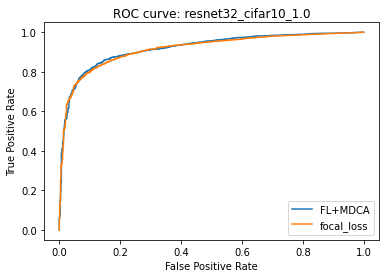

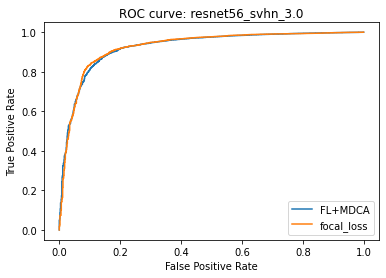

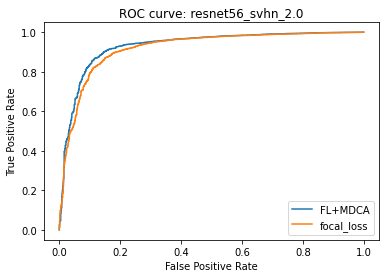

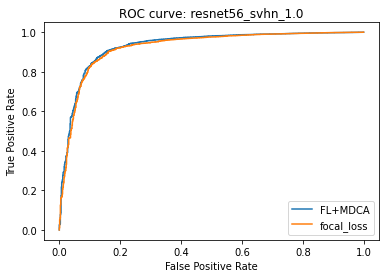

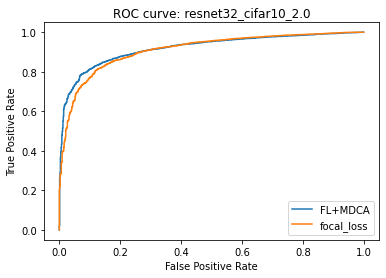

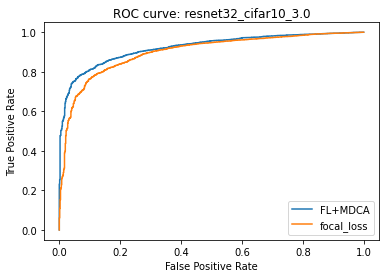

In [82]:
plots={}
for file in os.listdir(root):
    if os.path.isfile(root+file):
        data=np.load(root+file)
        model=file.split('_')[2]
        dataset=file.split('_')[0]
        loss=get_trained_loss(file)
        gamma=0
        if 'focal_loss' in file:
            gamma= file[file.find("gamma=")+6:file.find("_anirudha")]
        else:
            gamma=file[file.find('gamma=')+6:file.find('_beta')]
            beta=file[file.find('beta=')+5:file.find('_anirudha')]
        for key in best_with_auroc:
            mykey=model+'_'+dataset+'_'+gamma
            if model==key["model"] and dataset==key["dataset"]  and float(gamma)==float(key["gamma"]):
                if 'focal_loss' in file :
                    if not mykey in plots:
                        plots[mykey]={}
                    plots[mykey]['focal_loss']=data
                    print(file) 
                else:
                    if "beta="+str(key['beta']) in file and "gamma="+str(key['gamma']) in file:
                        if not mykey in plots:
                            plots[mykey]={}
                        plots[mykey]['FL+MDCA']=data
                        print(file)
# print(plots)
for p in plots:
    plt.figure()
    print(p)
    data=plots[p]["FL+MDCA"]
    x=data[0:len(data)//2]
    y=data[len(data)//2:]
    plt.plot(x,y,label="FL+MDCA")
    data=plots[p]["focal_loss"]
    x=data[0:len(data)//2]
    y=data[len(data)//2:]
    plt.plot(x,y,label="focal_loss")
    plt.title("ROC curve: "+p)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig(root+"/plots/"+p+"_combined_bestauroc.png",dpi=600)